# Convolutional Neural Networks Lab

Welcome to the Building Convolutional Neural Networks lab! By the end of this lab, you will have

- Built a deep convolutional neural network to classify images from the CIFAR-10 dataset

Let's get started!

# CIFAR-10

CIFAR-10 is a dataset of `32x32` RGB images containing the classes

0. Airplane
1. Car
2. Bird
3. Cat
4. Deer
5. Dog
6. Frog
7. Horse
8. Boat
9. Truck

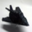

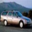

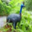

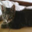

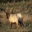

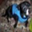

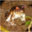

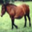

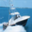

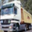

In [2]:
from IPython.display import display
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import array_to_img, img_to_array

[X, y], _ = cifar10.load_data()
X, y = X.astype(np.float), y.flatten()
imgs = [array_to_img(x).resize(size=[150, 150]) for x in X]
X = [img_to_array(img) for img in imgs]

idxs = [np.argwhere(y == i).flatten()[0] for i in range(10)]
for idx in idxs:
    x = X[idx]
    img = array_to_img(x)
    display(img)

# Architecture Definition

We will be using the following architecture to classify CIFAR-10 images.

![Forward Backward Example](images/graph.png)
Let's take this section at a time.

## First Convolutional Block

Throughout the network, we see a pattern of **Conv $\rightarrow$ ReLU $\rightarrow$ Max-Pool**. Let's consider the first convolutional block.

Consider the first convolutional block

![First Conv Block](images/First%20Conv%20Block.png)

It consists of a convolutional layer with $K=32$ filters each sized `3x3` with stride $S = 1$. This is followed by a ReLU activation and then a $F =$ 2x2 max-pooling layer with stride $S = 2$. The input size is `3x32x32`.

### Questions

- What is the input shape to the convolutional and the ReLU layers?
- What is the output shape of the pooling layer?

### Tasks

- Create a keras model and add this first convolutional block
- Call `keras.models.Model.summary()` to verify the dimensions are correct

### Hints

- Pass `input_shape=[32, 32, 3]` to the convolutional layer since it's the first layer in the network
- Look at the documentation for [`keras.layers.Conv2D`](https://keras.io/layers/convolutional/#conv2d), [`keras.layers.Activation`](https://keras.io/activations/), and [`keras.layers.MaxPooling2D`](https://keras.io/layers/pooling/#maxpooling2d).

In [7]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=3, input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
Total params: 896.0
Trainable params: 896.0
Non-trainable params: 0.0
_________________________________________________________________


## Second Convolutional Block

The second convolutional block is exactly the same as the first convolutional block. 

![Second Conv Block](images/Second%20Conv%20Block.png)
However, the input is a tensor of *activations* and no longer the image itself. Hence the resulting shapes will be different.

### Questions

- What is the input shape to the convolutional and the ReLU layers?
- What is the output shape of the pooling layer?

### Tasks

- Add the second convolutional block to the model
- Call `keras.models.Model.summary()` to verify the dimensions are correct

In [10]:
model.add(Convolution2D(filters=32, kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
Total para

## Third Convolutional Layer

As the spatial dimension of our activation maps decreases, we increase the depth of our activation volumes by upping the number of filters to 64 from 32.

### Questions

- What is the input shape to the convolutional and the ReLU layers?
- What is the output shape of the pooling layer?

### Tasks

- Add the second convolutional block to the model
- Call `keras.models.Model.summary()` to verify the dimensions are correct

In [11]:
model.add(Convolution2D(filters=64, kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))

SyntaxError: unexpected EOF while parsing (<ipython-input-11-6ead4bafdd41>, line 3)

# Bottleneck Layers

We will use no more convolutional layers. Since every activation has a view of the entire input. we use a repeating dense block.

## First Dense Block

In our bottleneck section, we have the repeating structure **Dense $\rightarrow$ ReLU $\rightarrow$ Dropout**.

![First Dense Block](images/First%20Dense%20Block.png)

The first layer is required to flatten our activation volume into a 1D tensor. We then run those activations through a Dense layer followed by a ReLU layer and then a Dropout layer with dropout probability of 0.5 for regularization.

### Questions

- What is the input shape to the Flatten, Dense, and ReLU layers?

### Tasks

- Add the first bottleneck block to the model
- Call `keras.models.Model.summary()` to verify the dimensions are correct

In [12]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## Second Dense Block

The second dense block is similar to the first.

![Second Dense Block](images/Second%20Dense%20Block.png)
However the shapes are slightly different because the input is to this dense block is the output from the first dense block. Addionally, we append a 10-way Dense layer followed by a softmax activation.

### Questions

- What is the input shape to the Flatten, Dense, ReLU, and final Dense layers?

### Tasks

- Add the second bottleneck block to the model
- Call `keras.models.Model.summary()` to verify the dimensions are correct

In [13]:
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
__________

## Train the CNN

Now that the architecture is defined, let's compile the model and train it on CIFAR-10 images.

### Tasks

- Compile the model
- Train it on CIFAR-10

### Hints

- Look at [`keras.models.Model.compile()`](https://keras.io/models/sequential/) and [`keras.models.Model.fit()`](https://keras.io/models/sequential/)
- Make sure to compile with the `metrics=accuracy` so that keras computes accuracy during training

In [14]:
from keras.utils.np_utils import to_categorical

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, to_categorical(y), epochs=1)

Epoch 1/1
50000/50000 [==============================] - 99s - loss: 14.4868 - acc: 0.0997      